# Linear Regression with Statsmodels for Movie Revenue

- 11/01/22

## Activity: Create a Linear Regression Model with Statsmodels for Revenue

- Today we will be working with JUST the data data from the TMDB API for years 2000-2021. 
    - We will prepare the data for modeling
        - Some feature engineering
        - Our usual Preprocessing
        - New steps for statsmodels!
    - We will fit a statsmodels linear regression.
    - We Will inspect the model summary.
    - We will create the visualizations to check assumptions about the residuals.



- Next class we will continue this activity.
    - We will better check all 4 assumptions.
    - We will discuss tactics for dealing with violations of the assumptions. 
    - We will use our coefficients to make stakeholder recommendations.

### Concepts Demonstrated

- [ ] Using `glob` for loading in all final files. 
- [ ] Statsmodels OLS
- [ ] QQ-Plot
- [ ] Residual Plot

# Loading the Data

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)

In [2]:
pd.set_option('display.max_columns',100)

### 📚 Finding & Loading Batches of Files with `glob`

In [3]:
## Checking what data we already have in our Data folder using os.listdir
import os
FOLDER = 'Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['.DS_Store',
 '.ipynb_checkpoints',
 '2010-2021',
 'combined_tmdb_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2002.json',
 'tmdb_api_results_2003.json',
 'tmdb_api_results_2004.json',
 'tmdb_api_results_2005.json',
 'tmdb_api_results_2006.json',
 'tmdb_api_results_2007.json',
 'tmdb_api_results_2008.json',
 'tmdb_api_results_2009.json',
 'tmdb_api_results_2010.json',
 'tmdb_api_results_2011.json',
 'tmdb_api_results_2012.json',
 'tmdb_api_results_2013.json',
 'tmdb_api_results_2014.json',
 'tmdb_api_results_2015.json',
 'tmdb_a

In [4]:
# ## Try loading in the first .csv.gz file from the list
# pd.read_csv(file_list[4])

> Why isn't it working?

In [5]:
## let's check the filepath 
file_list[4]

'final_tmdb_data_2000.csv.gz'

In [6]:
## add the folder plus filename
FOLDER+ file_list[4]

'Data/final_tmdb_data_2000.csv.gz'

In [7]:
## try read csv with folder plus filename
pd.read_csv(FOLDER+ file_list[4])

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.974,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.341,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,tt6174238,0.0,NaN,"{'id': 404302, 'name': 'Cold War Collection', ...",0.0,"[{'id': 80, 'name': 'Crime'}]",NaN,223878.0,en,Cold War,"Since the death of his wife three years ago, K...",0.913,/4p58ILmqsfPGS9iRCX3riekJt8e.jpg,[],"[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-06-17,0.0,0.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Cold War,0.0,2.0,2.0,NaN
1194,tt7029820,0.0,NaN,NaN,0.0,[],NaN,604889.0,en,Scream For Christmas,A Christmas party is interrupted by a violent ...,0.600,NaN,[],[],NaN,0.0,80.0,[],Released,NaN,Scream For Christmas,0.0,0.0,0.0,NaN
1195,tt7197642,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,872676.0,en,"Goodbye, Merry-Go-Round",Maryland comedy,0.600,NaN,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-12-12,0.0,90.0,[],Released,NaN,"Goodbye, Merry-Go-Round",0.0,0.0,0.0,NaN
1196,tt7631368,0.0,/sF0gUHE0YzZNXYugTB2LFxJIppf.jpg,NaN,10000000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,97186.0,fr,"I, Vampire",A sensual trilogy of vampire stories from Wiza...,0.987,/cl47LE7zYELjTzH7gfyvzBrCG5W.jpg,[],[],2000-10-17,0.0,85.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,"I, Vampire",0.0,6.4,4.0,NR


- Now we would do that in a loop, and only want to open .csv.gz.
- But there is a better way!
>- Introducing `glob`
    - Glob takes a filepath/query and will find every filename that matches the pattern provided.
    - We use asterisks as wildcards in our query.
    


In [8]:
import glob
## Make a filepath query
q = "Data/final*.csv.gz"
file_list = sorted(glob.glob(q))
file_list

['Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz',
 'Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz']

In [9]:
# Use glob.glob to get COMPLETE filepaths
pd.read_csv(file_list[0])

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.974,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.341,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,tt6174238,0.0,NaN,"{'id': 404302, 'name': 'Cold War Collection', ...",0.0,"[{'id': 80, 'name': 'Crime'}]",NaN,223878.0,en,Cold War,"Since the death of his wife three years ago, K...",0.913,/4p58ILmqsfPGS9iRCX3riekJt8e.jpg,[],"[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-06-17,0.0,0.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Cold War,0.0,2.0,2.0,NaN
1194,tt7029820,0.0,NaN,NaN,0.0,[],NaN,604889.0,en,Scream For Christmas,A Christmas party is interrupted by a violent ...,0.600,NaN,[],[],NaN,0.0,80.0,[],Released,NaN,Scream For Christmas,0.0,0.0,0.0,NaN
1195,tt7197642,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,872676.0,en,"Goodbye, Merry-Go-Round",Maryland comedy,0.600,NaN,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-12-12,0.0,90.0,[],Released,NaN,"Goodbye, Merry-Go-Round",0.0,0.0,0.0,NaN
1196,tt7631368,0.0,/sF0gUHE0YzZNXYugTB2LFxJIppf.jpg,NaN,10000000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,97186.0,fr,"I, Vampire",A sensual trilogy of vampire stories from Wiza...,0.987,/cl47LE7zYELjTzH7gfyvzBrCG5W.jpg,[],[],2000-10-17,0.0,85.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,"I, Vampire",0.0,6.4,4.0,NR


> But where are the rest of the years?

In [10]:
## in a sub-folder


- Recursive Searching with glob.
    - add a `**/` in the middle of your query to grab any matches from all subfolders. 

In [11]:
# Use glob.glob to get COMPLETE filepaths

q = "Data/**/final*.csv.gz"
file_list = sorted(glob.glob(q,recursive=True))
file_list

['Data/2010-2021/final_tmdb_data_2010.csv.gz',
 'Data/2010-2021/final_tmdb_data_2011.csv.gz',
 'Data/2010-2021/final_tmdb_data_2012.csv.gz',
 'Data/2010-2021/final_tmdb_data_2013.csv.gz',
 'Data/2010-2021/final_tmdb_data_2014.csv.gz',
 'Data/2010-2021/final_tmdb_data_2015.csv.gz',
 'Data/2010-2021/final_tmdb_data_2016.csv.gz',
 'Data/2010-2021/final_tmdb_data_2017.csv.gz',
 'Data/2010-2021/final_tmdb_data_2018.csv.gz',
 'Data/2010-2021/final_tmdb_data_2019.csv.gz',
 'Data/2010-2021/final_tmdb_data_2020.csv.gz',
 'Data/2010-2021/final_tmdb_data_2021.csv.gz',
 'Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz',
 'Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz']

In [12]:
df_list = []

for file in file_list:
    temp = pd.read_csv(file, lineterminator='\n')
    df_list.append(temp)
    
len(df_list)

22

- Dealing with ParserErrors with "possibly malformed files"

    - for a reason I do not fully understand yet, some of the files I downloaded error if I try to read them.
        - "ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.`
    - After some googling, the fix was to add `lineterminator='\n'` to pd.read_csv


In [13]:
df_list = []

for file in file_list:
    temp = pd.read_csv(file, lineterminator='\n')
    df_list.append(temp)
    
len(df_list)

22

In [14]:
df= pd.concat(df_list)
df = df.reset_index(drop=True)
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,Marcus (Philip WInchester) wakes up in the mid...,6.120,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-04-23,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",0.600,/xMMehQD3VWgorYoqvlTeQXSbsFo.jpg,[],[],2010-01-01,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",2.418,/zBFUv1EjHqLaDI38sgaBoEnhepL.jpg,"[{'id': 46102, 'logo_path': None, 'name': 'Ill...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-05-20,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60147,tt7661128,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,595306.0,en,Cold by Nature,"Caleb Bodine and his mother Rachel, ardent ani...",0.600,NaN,"[{'id': 117146, 'logo_path': None, 'name': 'JE...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-09-01,250000.0,77.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Cold by Nature,0.0,0.0,0.0,PG-13
60148,tt7786614,0.0,NaN,NaN,0.0,[],NaN,616643.0,en,Ci qing,"""Tattoo is like a film noir situated on a diff...",0.600,/pWtd3CS2VrfGPJvuH19swbGA5Wy.jpg,[],[],2009-01-01,0.0,100.0,[],Released,NaN,Tattoo,0.0,5.0,1.0,NaN
60149,tt8170758,0.0,NaN,NaN,0.0,[],NaN,513464.0,en,The Swell Season: One Step Away,"Recorded at the Riverside Theater, Milwaukee, ...",0.600,/zhxe5IA0LQljYQFv9RPqHpr5smH.jpg,[],[],2009-10-27,0.0,61.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Swell Season: One Step Away,0.0,0.0,0.0,NR
60150,tt9330112,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,111622.0,ta,நினைத்தாலே இனிக்கும்,Shiva gets nostalgic thinking about his colleg...,1.201,/nGOWnsmpn0LgZuCyBDXdZOIYIiA.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2009-09-04,0.0,145.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Ninaithale Inikkum,0.0,4.0,1.0,NaN


In [15]:
# ## use a list comprehension to load in all files into 1 dataframe

df = pd.concat([pd.read_csv(file, lineterminator='\n') for file in file_list])
df = df.reset_index(drop=True)

df


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,Marcus (Philip WInchester) wakes up in the mid...,6.120,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-04-23,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",0.600,/xMMehQD3VWgorYoqvlTeQXSbsFo.jpg,[],[],2010-01-01,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",2.418,/zBFUv1EjHqLaDI38sgaBoEnhepL.jpg,"[{'id': 46102, 'logo_path': None, 'name': 'Ill...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-05-20,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60147,tt7661128,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,595306.0,en,Cold by Nature,"Caleb Bodine and his mother Rachel, ardent ani...",0.600,NaN,"[{'id': 117146, 'logo_path': None, 'name': 'JE...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-09-01,250000.0,77.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Cold by Nature,0.0,0.0,0.0,PG-13
60148,tt7786614,0.0,NaN,NaN,0.0,[],NaN,616643.0,en,Ci qing,"""Tattoo is like a film noir situated on a diff...",0.600,/pWtd3CS2VrfGPJvuH19swbGA5Wy.jpg,[],[],2009-01-01,0.0,100.0,[],Released,NaN,Tattoo,0.0,5.0,1.0,NaN
60149,tt8170758,0.0,NaN,NaN,0.0,[],NaN,513464.0,en,The Swell Season: One Step Away,"Recorded at the Riverside Theater, Milwaukee, ...",0.600,/zhxe5IA0LQljYQFv9RPqHpr5smH.jpg,[],[],2009-10-27,0.0,61.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Swell Season: One Step Away,0.0,0.0,0.0,NR
60150,tt9330112,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,111622.0,ta,நினைத்தாலே இனிக்கும்,Shiva gets nostalgic thinking about his colleg...,1.201,/nGOWnsmpn0LgZuCyBDXdZOIYIiA.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2009-09-04,0.0,145.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Ninaithale Inikkum,0.0,4.0,1.0,NaN


In [16]:
# remove ids that are 0
df = df.loc[ df['imdb_id']!='0']
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,Marcus (Philip WInchester) wakes up in the mid...,6.120,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-04-23,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",0.600,/xMMehQD3VWgorYoqvlTeQXSbsFo.jpg,[],[],2010-01-01,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",2.418,/zBFUv1EjHqLaDI38sgaBoEnhepL.jpg,"[{'id': 46102, 'logo_path': None, 'name': 'Ill...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-05-20,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN
5,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,When the kingdom's most wanted-and most charmi...,119.168,/ym7Kst6a4uodryxqbGOxmewF235.jpg,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-11-24,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.6,9364.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60147,tt7661128,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,595306.0,en,Cold by Nature,"Caleb Bodine and his mother Rachel, ardent ani...",0.600,NaN,"[{'id': 117146, 'logo_path': None, 'name': 'JE...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-09-01,250000.0,77.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Cold by Nature,0.0,0.0,0.0,PG-13
60148,tt7786614,0.0,NaN,NaN,0.0,[],NaN,616643.0,en,Ci qing,"""Tattoo is like a film noir situated on a diff...",0.600,/pWtd3CS2VrfGPJvuH19swbGA5Wy.jpg,[],[],2009-01-01,0.0,100.0,[],Released,NaN,Tattoo,0.0,5.0,1.0,NaN
60149,tt8170758,0.0,NaN,NaN,0.0,[],NaN,513464.0,en,The Swell Season: One Step Away,"Recorded at the Riverside Theater, Milwaukee, ...",0.600,/zhxe5IA0LQljYQFv9RPqHpr5smH.jpg,[],[],2009-10-27,0.0,61.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Swell Season: One Step Away,0.0,0.0,0.0,NR
60150,tt9330112,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,111622.0,ta,நினைத்தாலே இனிக்கும்,Shiva gets nostalgic thinking about his colleg...,1.201,/nGOWnsmpn0LgZuCyBDXdZOIYIiA.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2009-09-04,0.0,145.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Ninaithale Inikkum,0.0,4.0,1.0,NaN


# Preprocessing

## Feature Engineering


- belongs to collection: convert to boolean
- Genres: get just name and manually OHE
- Cleaning Categories in Certification
- Converting release date to year, month, and day.

### belongs to collection

In [17]:
# there are 3,700+ movies that belong to collections
df['belongs_to_collection'].value_counts()

{'id': 39199, 'name': 'Detective Conan Collection', 'poster_path': '/1wBfr532NOQK68wlo5ApjCmiQIB.jpg', 'backdrop_path': '/9bogrpii4e61SR6a9qLHow7I46U.jpg'}       18
{'id': 148065, 'name': 'Doraemon Collection', 'poster_path': '/4TLSP1KD1uAlp2q1rTrc6SFlktX.jpg', 'backdrop_path': '/rc6OFcSasL5YxBRPUQVwxmVF6h5.jpg'}             16
{'id': 403643, 'name': 'Troublesome Night Collection', 'poster_path': '/bPTx3TP4UJTHQfcLx4qIub9LXmi.jpg', 'backdrop_path': '/n3a7zF5GuxM2X8oPF6pKXqYS6ER.jpg'}    15
{'id': 23456, 'name': 'One Piece Collection', 'poster_path': '/nvAPotUDNcKStSOv2ojGZBNOX8A.jpg', 'backdrop_path': '/3RqSKjokWlXyTBUt3tcR9CrOG57.jpg'}             13
{'id': 23616, 'name': 'Naruto Collection', 'poster_path': '/q9rrfRgPUFkFqDF74jlvNYp3RpN.jpg', 'backdrop_path': '/prLI2SNNkd9wcQkFh9iWXzQtR5D.jpg'}                11
                                                                                                                                                                  ..
{'id': 619

In [18]:
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_43708/3657013767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['belongs_to_collection'] = df['belongs_to_collection'].notna()


False    56392
True      3738
Name: belongs_to_collection, dtype: int64

### genre

In [19]:
df['genres']

1        [{'id': 10751, 'name': 'Family'}, {'id': 16, '...
2        [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...
3                                                       []
4        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
5        [{'id': 16, 'name': 'Animation'}, {'id': 10751...
                               ...                        
60147                     [{'id': 53, 'name': 'Thriller'}]
60148                                                   []
60149                                                   []
60150    [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...
60151    [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...
Name: genres, Length: 60130, dtype: object

In [20]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [21]:
## Use our function and exploding the new column
#get_genre_name(df.loc[3,'genres'])
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode


/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_43708/2389209684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres_list'] = df['genres'].apply(get_genre_name)


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,genres_list
1,tt0312305,0.0,NaN,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN,Family
1,tt0312305,0.0,NaN,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN,Animation
1,tt0312305,0.0,NaN,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN,Science Fiction
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,Marcus (Philip WInchester) wakes up in the mid...,6.120,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-04-23,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13,Thriller
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,Marcus (Philip WInchester) wakes up in the mid...,6.120,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-04-23,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13,Mystery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60150,tt9330112,0.0,NaN,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,111622.0,ta,நினைத்தாலே இனிக்கும்,Shiva gets nostalgic thinking about his colleg...,1.201,/nGOWnsmpn0LgZuCyBDXdZOIYIiA.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2009-09-04,0.0,145.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Ninaithale Inikkum,0.0,4.0,1.0,NaN,Drama
60150,tt9330112,0.0,NaN,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,111622.0,ta,நினைத்தாலே இனிக்கும்,Shiva gets nostalgic thinking about his colleg...,1.201,/nGOWnsmpn0LgZuCyBDXdZOIYIiA.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2009-09-04,0.0,145.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Ninaithale Inikkum,0.0,4.0,1.0,NaN,Thriller
60150,tt9330112,0.0,NaN,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,111622.0,ta,நினைத்தாலே இனிக்கும்,Shiva gets nostalgic thinking about his colleg...,1.201,/nGOWnsmpn0LgZuCyBDXdZOIYIiA.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2009-09-04,0.0,145.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Ninaithale Inikkum,0.0,4.0,1.0,NaN,Mystery
60151,tt9556198,0.0,NaN,True,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",NaN,488412.0,ja,深海獣雷牙,When the Earth's ecosystem is disrupted due to..

In [22]:
## save unique genres

unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Family', 'Animation', 'Science Fiction', 'Thriller', 'Mystery',
       'Drama', 'Romance', 'Comedy', 'War', 'Crime', 'Action',
       'Adventure', 'Horror', 'Fantasy', 'History', 'Western', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

In [23]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex =False)
df

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_43708/3269323124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex =False)
/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_43708/3269323124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex =False)
/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_43708/3269323124.py:3: SettingWithCopyWarning: 
A value is 

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
1,tt0312305,0.0,NaN,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN,"[Family, Animation, Science Fiction]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,Marcus (Philip WInchester) wakes up in the mid...,6.120,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-04-23,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13,"[Thriller, Mystery, Drama]",False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0331312,0.0,NaN,False,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",0.600,/xMMehQD3VWgorYoqvlTeQXSbsFo.jpg,[],[],2010-01-01,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,False,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",2.418,/zBFUv1EjHqLaDI38sgaBoEnhepL.jpg,"[{'id': 46102, 'logo_path': None, 'name': 'Ill...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-05-20,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN,"[Romance, Comedy, Drama]",False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
5,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,When the kingdom's most wanted-and most charmi...,119.168,/ym7Kst6a4uodryxqbGOxmewF235.jpg,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-11-24,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.6,9364.0,PG,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60147,tt7661128,0.0,NaN,False,0.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,595306.0,en,Cold by Nature,"Caleb Bodine and his mother Rachel, ardent ani...",0.600,NaN,"[{'id': 117146, 'logo_path': None, 'name': 'JE...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-09-01,250000.0,77.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Cold by Nature,0.0,0.0,0.0,PG-13,[T

### certification

In [24]:
## Checking Certification values
df['certification'].value_counts(dropna=False)

NaN                                45506
R                                   6097
NR                                  3261
PG-13                               3224
PG                                  1432
G                                    442
NC-17                                156
Unrated                                5
R                                      1
PG-13                                  1
10                                     1
-                                      1
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
Name: certification, dtype: int64

In [25]:
# fix extra space certs
df['certification'] = df['certification'].str.strip()
df['certification'].value_counts(dropna=False)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_43708/1084505190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['certification'] = df['certification'].str.strip()


NaN                                45506
R                                   6098
NR                                  3261
PG-13                               3225
PG                                  1432
G                                    442
NC-17                                156
Unrated                                5
10                                     1
-                                      1
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
Name: certification, dtype: int64

In [26]:
## fix certification col
## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_43708/1335847551.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['certification'] = df['certification'].replace(repl_cert)


NaN      45507
R         6098
NR        3270
PG-13     3225
PG        1432
G          442
NC-17      156
Name: certification, dtype: int64

### Converting year to sep features

In [27]:
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True).copy()
df[new_cols] = df[new_cols].astype(float)
df

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_43708/2594393803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_cols] = df['release_date'].str.split('-',expand=True).copy()
/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_43708/2594393803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_cols] = df['release_date'].str.split('-',expand=True).copy()
/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_43708/2594393803.py:3: SettingWithCopyWarning: 
A value is tr

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
1,tt0312305,0.0,NaN,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN,"[Family, Animation, Science Fiction]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2012.0,12.0,2.0
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,Marcus (Philip WInchester) wakes up in the mid...,6.120,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-04-23,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13,"[Thriller, Mystery, Drama]",False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,4.0,23.0
3,tt0331312,0.0,NaN,False,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",0.600,/xMMehQD3VWgorYoqvlTeQXSbsFo.jpg,[],[],2010-01-01,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,1.0,1.0
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,False,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",2.418,/zBFUv1EjHqLaDI38sgaBoEnhepL.jpg,"[{'id': 46102, 'logo_path': None, 'name': 'Ill...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-05-20,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN,"[Romance, Comedy, Drama]",False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,5.0,20.0
5,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,When the kingdom's most wanted-and most charmi...,119.168,/ym7Kst6a4uodryxqbGOxmewF235.jpg,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-11-24,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.6,9364.0,PG,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60147,tt7661128,0.0,NaN,False,0.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,595306.0,en,Cold by Nature,"Caleb Bodine and his mother Rachel, ardent ani...",0.600,NaN,"[{'id': 117146, 'logo_path': None, 'name': 'JE...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-09-01,250000.

In [28]:
## Drop original genre & release data cols
df  = df.drop(columns=['genres','genres_list','release_date'])
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
1,tt0312305,0.0,NaN,False,0.0,http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2012.0,12.0,2.0
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,False,0.0,http://www.inmysleep.com,40048.0,en,In My Sleep,Marcus (Philip WInchester) wakes up in the mid...,6.120,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,4.0,23.0
3,tt0331312,0.0,NaN,False,0.0,NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",0.600,/xMMehQD3VWgorYoqvlTeQXSbsFo.jpg,[],[],0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,1.0,1.0
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,False,300000.0,NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",2.418,/zBFUv1EjHqLaDI38sgaBoEnhepL.jpg,"[{'id': 46102, 'logo_path': None, 'name': 'Ill...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,5.0,20.0
5,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,False,260000000.0,http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,When the kingdom's most wanted-and most charmi...,119.168,/ym7Kst6a4uodryxqbGOxmewF235.jpg,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...","[{'iso_3166_1': 'US', 'name': 'United States o...",592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.6,9364.0,PG,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60147,tt7661128,0.0,NaN,False,0.0,NaN,595306.0,en,Cold by Nature,"Caleb Bodine and his mother Rachel, ardent ani...",0.600,NaN,"[{'id': 117146, 'logo_path': None, 'name': 'JE...","[{'iso_3166_1': 'US', 'name': 'United States o...",250000.0,77.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Cold by Nature,0.0,0.0,0.0,PG-13,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2009.0,9.0,1.0
60148,tt7786614,0.0,NaN,False,0.0,NaN,616643.0,en,Ci qing,"""Tattoo is like a film noir situated on a diff...",0.600,/pWtd3CS2VrfGPJvuH19swbGA5Wy.jpg,[],[],0.0,100.0,[],Released,NaN,Tattoo,0.0,5.0,1.0,NaN,False,False,False,False,False,False,Fa

In [29]:
## saving the partially preprocessed csv to disk

df.to_csv('Data/combined_tmdb_data.csv.gz',compression='gzip',index=False)#,line_terminator='\n')
pd.read_csv('Data/combined_tmdb_data.csv.gz', lineterminator="\n")

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
0,tt0312305,0.0,NaN,False,0.0,http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2012.0,12.0,2.0
1,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,False,0.0,http://www.inmysleep.com,40048.0,en,In My Sleep,Marcus (Philip WInchester) wakes up in the mid...,6.120,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,4.0,23.0
2,tt0331312,0.0,NaN,False,0.0,NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",0.600,/xMMehQD3VWgorYoqvlTeQXSbsFo.jpg,[],[],0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,1.0,1.0
3,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,False,300000.0,NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",2.418,/zBFUv1EjHqLaDI38sgaBoEnhepL.jpg,"[{'id': 46102, 'logo_path': None, 'name': 'Ill...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,5.0,20.0
4,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,False,260000000.0,http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,When the kingdom's most wanted-and most charmi...,119.168,/ym7Kst6a4uodryxqbGOxmewF235.jpg,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...","[{'iso_3166_1': 'US', 'name': 'United States o...",592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.6,9364.0,PG,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt7661128,0.0,NaN,False,0.0,NaN,595306.0,en,Cold by Nature,"Caleb Bodine and his mother Rachel, ardent ani...",0.600,NaN,"[{'id': 117146, 'logo_path': None, 'name': 'JE...","[{'iso_3166_1': 'US', 'name': 'United States o...",250000.0,77.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Cold by Nature,0.0,0.0,0.0,PG-13,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2009.0,9.0,1.0
60126,tt7786614,0.0,NaN,False,0.0,NaN,616643.0,en,Ci qing,"""Tattoo is like a film noir situated on a diff...",0.600,/pWtd3CS2VrfGPJvuH19swbGA5Wy.jpg,[],[],0.0,100.0,[],Released,NaN,Tattoo,0.0,5.0,1.0,NaN,False,False,False,False,False,False,Fa

## Train Test Split

In [30]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','status','tagline','id','homepage',
                 'production_countries','video','production_companies','spoken_languages',
            'original_language']#,'title','imdb_id']

df = df.drop(columns=drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60130 entries, 1 to 60151
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60130 non-null  object 
 1   adult                  60130 non-null  float64
 2   belongs_to_collection  60130 non-null  bool   
 3   budget                 60130 non-null  float64
 4   popularity             60130 non-null  float64
 5   revenue                60130 non-null  float64
 6   runtime                59298 non-null  float64
 7   title                  60130 non-null  object 
 8   vote_average           60130 non-null  float64
 9   vote_count             60130 non-null  float64
 10  certification          14623 non-null  object 
 11  Genre_Family           60130 non-null  bool   
 12  Genre_Animation        60130 non-null  bool   
 13  Genre_Science Fiction  60130 non-null  bool   
 14  Genre_Thriller         60130 non-null  bool   
 15  Ge

In [31]:
## Make x and y variables
drop_for_model = ['title','imdb_id']

y = df['revenue'].copy()
X = df.drop(columns=['revenue',*drop_for_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
X_train.head()

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
9542,0.0,False,0.0,1.113,80.0,5.3,5.0,NaN,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,2013.0,10.0,1.0
16559,0.0,False,0.0,1.875,92.0,6.0,2.0,NaN,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2015.0,4.0,15.0
34116,0.0,False,0.0,1.499,101.0,2.0,1.0,R,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2020.0,11.0,4.0
3806,0.0,False,0.0,1.506,100.0,7.7,3.0,PG,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,2011.0,9.0,24.0
37758,0.0,False,300000.0,0.600,138.0,5.0,2.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2020.0,9.0,18.0


In [32]:
X_train.isna().sum()

adult                        0
belongs_to_collection        0
budget                       0
popularity                   0
runtime                    638
vote_average                 0
vote_count                   0
certification            34082
Genre_Family                 0
Genre_Animation              0
Genre_Science Fiction        0
Genre_Thriller               0
Genre_Mystery                0
Genre_Drama                  0
Genre_Romance                0
Genre_Comedy                 0
Genre_War                    0
Genre_Crime                  0
Genre_Action                 0
Genre_Adventure              0
Genre_Horror                 0
Genre_Fantasy                0
Genre_History                0
Genre_Western                0
Genre_Music                  0
Genre_Documentary            0
Genre_TV Movie               0
year                       792
month                      792
day                        792
dtype: int64

In [33]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_select(X_train)

['certification']

In [34]:
## select manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
bool_select(X_train)

['belongs_to_collection',
 'Genre_Family',
 'Genre_Animation',
 'Genre_Science Fiction',
 'Genre_Thriller',
 'Genre_Mystery',
 'Genre_Drama',
 'Genre_Romance',
 'Genre_Comedy',
 'Genre_War',
 'Genre_Crime',
 'Genre_Action',
 'Genre_Adventure',
 'Genre_Horror',
 'Genre_Fantasy',
 'Genre_History',
 'Genre_Western',
 'Genre_Music',
 'Genre_Documentary',
 'Genre_TV Movie']

In [35]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_select(X_train)

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [36]:
## convert manual ohe to int

already_ohe_cols = bool_select(X_train)
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

### Simplifying with sklearn v1.1

In [37]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = make_column_transformer((cat_pipe,cat_select),
                                        (num_pipe, num_select),
                                       ('passthrough',bool_select),
                                      verbose_feature_names_out=False)# remainder='passthrough')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x2995665b0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x2995698e0>),
                                ('passthrough', 'passthrough',
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x2995695b0>)],
                  verbose_feature_names_out=False)

In [38]:
## fit the col transformer
preprocessor.fit(X_train)

# using get_feature_names_out
final_features = preprocessor.get_feature_names_out()
final_features

array(['certification_G', 'certification_MISSING', 'certification_NC-17',
       'certification_NR', 'certification_PG', 'certification_PG-13',
       'certification_R', 'adult', 'belongs_to_collection', 'budget',
       'popularity', 'runtime', 'vote_average', 'vote_count',
       'Genre_Family', 'Genre_Animation', 'Genre_Science Fiction',
       'Genre_Thriller', 'Genre_Mystery', 'Genre_Drama', 'Genre_Romance',
       'Genre_Comedy', 'Genre_War', 'Genre_Crime', 'Genre_Action',
       'Genre_Adventure', 'Genre_Horror', 'Genre_Fantasy',
       'Genre_History', 'Genre_Western', 'Genre_Music',
       'Genre_Documentary', 'Genre_TV Movie', 'year', 'month', 'day'],
      dtype=object)

In [39]:
## make X_train_tf 
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
9542,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.113,80.0,5.3,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013.0,10.0,1.0
16559,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.875,92.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0,4.0,15.0
34116,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.499,101.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,11.0,4.0
3806,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.506,100.0,7.7,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0,9.0,24.0
37758,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,0.600,138.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,9.0,18.0


In [40]:
## make X_test_tf 

X_test_tf = pd.DataFrame( preprocessor.transform(X_test), 
                         columns=final_features, index=X_test.index)
X_test_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
19258,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,1.422,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0,12.0,17.0
40675,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.180,99.0,7.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,11.0,26.0
35605,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.285,0.0,6.4,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,8.0,15.0
980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.052,90.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010.0,1.0,1.0
44067,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26000000.0,16.946,126.0,7.4,1011.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2021.0,2.0,12.0


### Adding a Constant for Statsmodels

In [41]:
##import statsmodels correctly
import statsmodels.api as sm

> Tip: make sure that add_constant actually added a new column! You may need to change the parameter `has_constant` to "add"

In [42]:
## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, has_constant='add')
X_test_df = sm.add_constant(X_test_tf, has_constant='add')
display(X_test_df.head(), X_train_df.head())

,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
19258,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,1.422,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0,12.0,17.0
40675,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.180,99.0,7.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,11.0,26.0
35605,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.285,0.0,6.4,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,8.0,15.0
980,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.052,90.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010.0,1.0,1.0
44067,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26000000.0,16.946,126.0,7.4,1011.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2021.0,2.0,12.0


,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
9542,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.113,80.0,5.3,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013.0,10.0,1.0
16559,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.875,92.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0,4.0,15.0
34116,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.499,101.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,11.0,4.0
3806,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.506,100.0,7.7,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0,9.0,24.0
37758,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,0.600,138.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,9.0,18.0


# 🎬**Part 2: 11/02/22**

## Modeling

### Statsmodels OLS

In [43]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     3972.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:11:57   Log-Likelihood:            -8.4213e+05
No. Observations:               45097   AIC:                         1.684e+06
Df Residuals:                   45061   BIC:                         1.685e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.674e+07   4.65e+07     -1.005      0.315   -1.38e+08    4.44e+07
certification_G       -5.295e+06   6.82e+06     -0.776      0.438   -1.87e+07    8.08e+06
certification_MISSING -2.089e+06    6.7e+06     -0.312      0.755   -1.52e+07     1.1e+07
certification_NC-17   -6.958e+06   7.13e+06     -0.976      0.329   -2.09e+07    7.01e+06
certification_NR       -3.31e+06   6.72e+06     -0.492      0.622   -1.65e+07    9.87e+06
certification_PG      -1.681e+06    6.7e+06     -0.251      0.802   -1.48e+07    1.15e+07
certification_PG-13   -1.082e+07   6.67e+06     -1.623      0.105   -2.39e+07    2.25e+06
certification_R       -1.659e+07   6.64e+06     -2.500      0.012   -2.96e+07   -3.58e+06
adult                  1.371e+06   3.64e+06      0.376      0.707   -5.77e+06    8.51e+06
belongs_to_collection  1.158e+07   6.56e+05     17.642      0.000    1.03e+07    1.29e+07
budget                    1.5448      0.014    110.732      0.000       1.517       1.572
popularity             1.419e+05   4441.421     31.954      0.000    1.33e+05    1.51e+05
runtime               -6249.4768   5192.945     -1.203      0.229   -1.64e+04    3928.782
vote_average          -4.954e+05   6.07e+04     -8.155      0.000   -6.14e+05   -3.76e+05
vote_count             2.895e+04    198.629    145.762      0.000    2.86e+04    2.93e+04
Genre_Family           -1.38e+06   7.42e+05     -1.859      0.063   -2.83e+06    7.49e+04
Genre_Animation        4.821e+05    9.2e+05      0.524      0.600   -1.32e+06    2.29e+06
Genre_Science Fiction -5.211e+06   6.74e+05     -7.730      0.000   -6.53e+06   -3.89e+06
Genre_Thriller        -1.327e+06   4.29e+05     -3.095      0.002   -2.17e+06   -4.86e+05
Genre_Mystery         -2.097e+06   6.88e+05     -3.046      0.002   -3.45e+06   -7.48e+05
Genre_Drama           -3.558e+05   3.37e+05     -1.054      0.292   -1.02e+06    3.06e+05
Genre_Romance           2.86e+04   4.59e+05      0.062      0.950   -8.72e+05    9.29e+05
Genre_Comedy          -3.946e+05   3.62e+05     -1.091      0.275    -1.1e+06    3.14e+05
Genre_War             -1.922e+06   1.23e+06     -1.559      0.119   -4.34e+06    4.95e+05
Genre_Crime           -2.812e+06   5.87e+05     -4.792      0.000   -3.96e+06   -1.66e+06
Genre_Action          -1.452e+06   5.04e+05     -2.880      0.004   -2.44e+06   -4.64e+05
Genre_Adventure        2.352e+06   7.41e+05      3.174      0.002       9e+05    3.81e+06
Genre_Horror          -5.668e+04   4.57e+05     -0.124      0.901   -9.53e+05     8.4e+05
Genre_Fantasy         -1.223e+06   7.42e+05     -1.648      0.099   -2.68e+06    2.31e+05
Genre_History         -4.411e+06   1.02e+06     -4.330      0.000   -6.41e+06   -2.41e+06
Genre_Western         -7.241e+06   1.81e+06     -3.994      0.000   -1.08e+07   -3.69e+06
Genre_Music            

### 📌 BOOKMARK: End of Class (11/01)

In [44]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.755
Testing R^2: 0.756


# The Assumptions of Linear Regression

- The 4 Assumptions of a Linear Regression are:
    - Linearity: That the input features have a linear relationship with the target.
    - Independence of features (AKA Little-to-No Multicollinearity): That the features are not strongly related to other features.
    - **Normality: The model's residuals are approximately normally distributed.**
    - **Homoscedasticity: The model residuals have equal variance across all predictions.**


### QQ-Plot for Checking for Normality

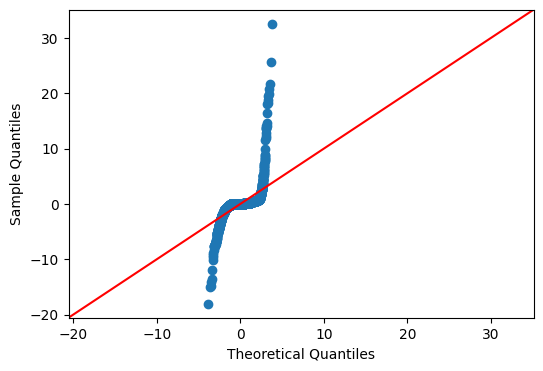

In [45]:
## Create a Q-QPlot

# first calculate residuals 
resid = y_test - y_hat_test

## then use sm's qqplot
fig, ax = plt.subplots(figsize=(6,4))
sm.graphics.qqplot(resid,line='45',fit=True,ax=ax);

### Residual Plot for Checking Homoscedasticity

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted Revenue')]

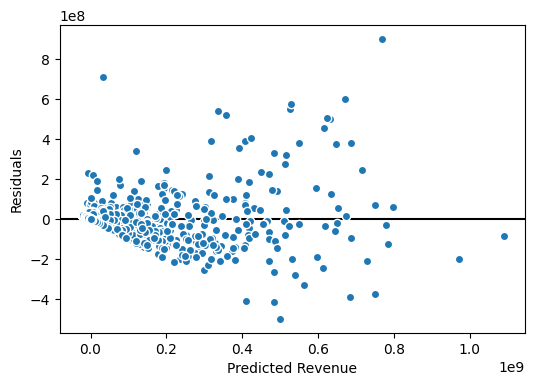

In [46]:
## Plot scatterplot with y_hat_test vs resids
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(y_hat_test, resid, ec='white')
ax.axhline(0,c='black',zorder=0)
ax.set(ylabel='Residuals',xlabel='Predicted Revenue')

### Putting it all together into a Function

In [47]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
    
    

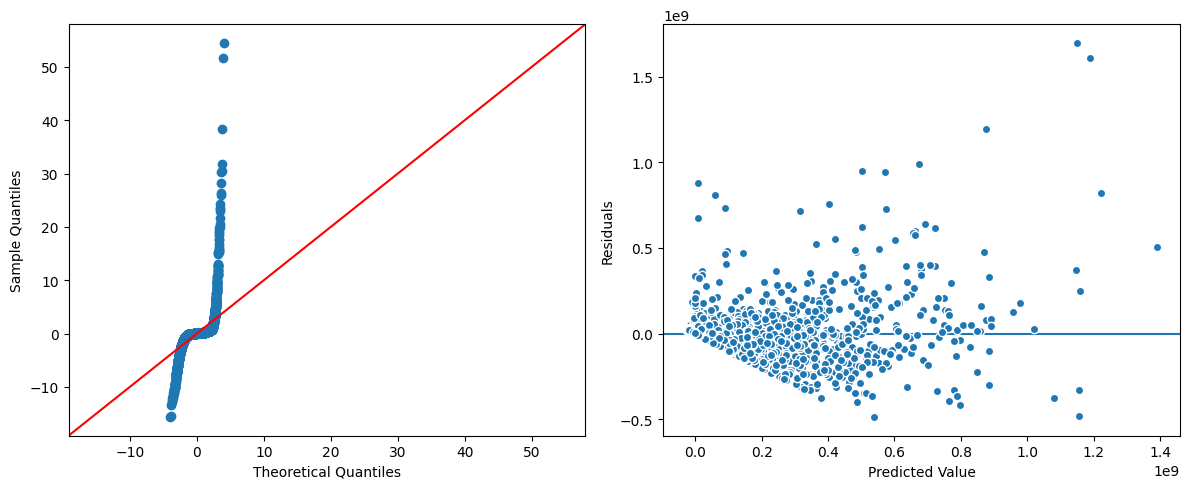

In [48]:
evaluate_ols(result,X_train_df, y_train)

### Checking our Coefficients

In [49]:
# extract the coefficients from model
result.params

const                   -4.673953e+07
certification_G         -5.295483e+06
certification_MISSING   -2.088945e+06
certification_NC-17     -6.957739e+06
certification_NR        -3.309960e+06
certification_PG        -1.681344e+06
certification_PG-13     -1.081667e+07
certification_R         -1.658939e+07
adult                    1.371141e+06
belongs_to_collection    1.157753e+07
budget                   1.544775e+00
popularity               1.419201e+05
runtime                 -6.249477e+03
vote_average            -4.953916e+05
vote_count               2.895248e+04
Genre_Family            -1.380035e+06
Genre_Animation          4.820774e+05
Genre_Science Fiction   -5.210616e+06
Genre_Thriller          -1.326643e+06
Genre_Mystery           -2.097304e+06
Genre_Drama             -3.557549e+05
Genre_Romance            2.859761e+04
Genre_Comedy            -3.945545e+05
Genre_War               -1.922489e+06
Genre_Crime             -2.812452e+06
Genre_Action            -1.451796e+06
Genre_Advent

In [50]:
# suppress scientific notation and add "," sep for 1,000's
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

In [51]:
result.params

const                   -46,739,533.30
certification_G          -5,295,483.44
certification_MISSING    -2,088,944.89
certification_NC-17      -6,957,739.03
certification_NR         -3,309,960.42
certification_PG         -1,681,344.41
certification_PG-13     -10,816,674.96
certification_R         -16,589,386.14
adult                     1,371,140.66
belongs_to_collection    11,577,526.81
budget                            1.54
popularity                  141,920.12
runtime                      -6,249.48
vote_average               -495,391.56
vote_count                   28,952.48
Genre_Family             -1,380,035.40
Genre_Animation             482,077.41
Genre_Science Fiction    -5,210,615.85
Genre_Thriller           -1,326,643.20
Genre_Mystery            -2,097,304.36
Genre_Drama                -355,754.86
Genre_Romance                28,597.61
Genre_Comedy               -394,554.54
Genre_War                -1,922,488.65
Genre_Crime              -2,812,452.06
Genre_Action             

## "Garbage In = Garbage Out"

- Before we dive into iterating on our model, I realized there were some big issues that I did not account for in the original data. 
    - some movies may not have been released. 
    - We should probably remove movies with 0 budget and revenue.
    

### Filtering

- Make sure to only keep:
    1. Status=Released.
    2. Budget >0
    3. Revenue >0

In [52]:
## Reloading partially processed data from earlier

df = pd.read_csv('Data/combined_tmdb_data.csv.gz', lineterminator="\n")

## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage',
                 'production_countries','video','production_companies','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,status,title,vote_average,vote_count,certification,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
0,tt0312305,0.00,False,0.00,2.77,0.00,45.00,Released,Quantum Quest: A Cassini Space Odyssey,8.40,7.00,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,012.00",12.00,2.00
1,tt0326965,0.00,False,0.00,6.12,0.00,90.00,Released,In My Sleep,5.50,31.00,PG-13,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,010.00",4.00,23.00
2,tt0331312,0.00,False,0.00,0.60,0.00,0.00,Released,This Wretched Life,5.00,1.00,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,010.00",1.00,1.00
3,tt0393049,0.00,False,"300,000.00",2.42,0.00,98.00,Released,Anderson's Cross,4.00,5.00,NaN,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,"2,010.00",5.00,20.00
4,tt0398286,0.00,False,"260,000,000.00",119.17,"592,461,732.00",100.00,Released,Tangled,7.60,"9,364.00",PG,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,010.00",11.00,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt7661128,0.00,False,0.00,0.60,"250,000.00",77.00,Released,Cold by Nature,0.00,0.00,PG-13,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,009.00",9.00,1.00
60126,tt7786614,0.00,False,0.00,0.60,0.00,100.00,Released,Tattoo,5.00,1.00,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,009.00",1.00,1.00
60127,tt8170758,0.00,False,0.00,0.60,0.00,61.00,Released,The Swell Season: One Step Away,0.00,0.00,NR,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,009.00",10.00,27.00
60128,tt9330112,0.00,False,0.00,1.20,0.00,145.00,Released,Ninaithale Inikkum,4.00,1.00,NaN,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,009.00",9.00,4.00


In [53]:
## Check status
df['status'].value_counts()

Released           60097
Post Production       27
In Production          6
Name: status, dtype: int64

In [54]:
## Save only Released status
df = df.loc[ df['status'] == 'Released']
df = df.drop(columns=['status'])
df

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
0,tt0312305,0.00,False,0.00,2.77,0.00,45.00,Quantum Quest: A Cassini Space Odyssey,8.40,7.00,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,012.00",12.00,2.00
1,tt0326965,0.00,False,0.00,6.12,0.00,90.00,In My Sleep,5.50,31.00,PG-13,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,010.00",4.00,23.00
2,tt0331312,0.00,False,0.00,0.60,0.00,0.00,This Wretched Life,5.00,1.00,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,010.00",1.00,1.00
3,tt0393049,0.00,False,"300,000.00",2.42,0.00,98.00,Anderson's Cross,4.00,5.00,NaN,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,"2,010.00",5.00,20.00
4,tt0398286,0.00,False,"260,000,000.00",119.17,"592,461,732.00",100.00,Tangled,7.60,"9,364.00",PG,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,010.00",11.00,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt7661128,0.00,False,0.00,0.60,"250,000.00",77.00,Cold by Nature,0.00,0.00,PG-13,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,009.00",9.00,1.00
60126,tt7786614,0.00,False,0.00,0.60,0.00,100.00,Tattoo,5.00,1.00,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,009.00",1.00,1.00
60127,tt8170758,0.00,False,0.00,0.60,0.00,61.00,The Swell Season: One Step Away,0.00,0.00,NR,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,009.00",10.00,27.00
60128,tt9330112,0.00,False,0.00,1.20,0.00,145.00,Ninaithale Inikkum,4.00,1.00,NaN,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,009.00",9.00,4.00


In [55]:
## filter out financials that don't have financial data
df = df.loc[(df['budget'] >0 ) & (df['revenue']>0)]
df

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
4,tt0398286,0.00,False,"260,000,000.00",119.17,"592,461,732.00",100.00,Tangled,7.60,"9,364.00",PG,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,010.00",11.00,24.00
6,tt0411951,0.00,True,"30,000,000.00",70.69,"967,000.00",92.00,Tekken,5.40,553.00,R,False,False,True,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,"2,010.00",3.00,20.00
9,tt0427152,0.00,False,"69,000,000.00",21.75,"86,387,857.00",114.00,Dinner for Schmucks,5.60,"1,452.00",PG-13,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"2,010.00",7.00,30.00
10,tt0429493,0.00,False,"110,000,000.00",56.49,"177,238,796.00",117.00,The A-Team,6.40,"3,877.00",PG-13,False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,"2,010.00",6.00,9.00
11,tt0435761,0.00,True,"200,000,000.00",93.98,"1,066,969,703.00",103.00,Toy Story 3,7.80,"12,455.00",G,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"2,010.00",6.00,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59859,tt1532382,0.00,True,"3,500,000.00",4.84,"3,704,408.00",97.00,Hooked on the Game,6.30,42.00,NaN,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,"2,009.00",11.00,26.00
59887,tt1542960,0.00,False,"300,000.00",1.94,"200,000.00",122.00,The Figurine (Araromire),4.20,11.00,NaN,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,"2,009.00",10.00,2.00
59923,tt1560950,0.00,True,600.00,1.79,3.00,81.00,D@bbe 2,1.90,10.00,NaN,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,"2,009.00",12.00,24.00
59929,tt1565058,0.00,True,"125,000.00",5.99,"3,470,000.00",88.00,A Blood Pledge,5.40,40.00,NaN,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,"2,009.00",6.00,18.00


In [56]:
## Make x and y variables
drop_for_model = ['title','imdb_id']##,'year']

y = df['revenue'].copy()
X = df.drop(columns=['revenue',*drop_for_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
9263,0.00,True,"8,000,000.00",16.15,106.00,6.30,449.00,NR,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,"2,013.00",8.00,30.00
20483,0.00,False,"9,000,000.00",21.73,138.00,7.50,"4,851.00",R,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,016.00",11.00,18.00
52156,0.00,False,"82,500,000.00",33.76,107.00,6.20,"5,830.00",PG-13,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,"2,006.00",6.00,23.00
48065,0.00,True,"28,000,000.00",22.53,102.00,5.40,904.00,PG,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,"2,003.00",3.00,14.00
715,0.00,False,"30,000,000.00",15.21,107.00,5.60,"1,240.00",R,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,"2,010.00",2.00,26.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,0.00,True,"12,902,809.00",4.46,108.00,7.40,"1,796.00",R,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,"2,010.00",4.00,29.00
15866,0.00,False,"15,000,000.00",11.00,128.00,5.90,220.00,NaN,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,"2,015.00",9.00,3.00
49811,0.00,False,"17,500,000.00",22.15,121.00,7.70,"2,279.00",PG-13,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,"2,004.00",3.00,4.00
43501,0.00,True,"185,000,000.00",408.22,132.00,7.70,"6,086.00",R,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,"2,021.00",7.00,28.00


In [57]:
## make X_train_tf 
preprocessor.fit(X_train)
final_features = preprocessor.get_feature_names_out()

X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)

X_test_tf = pd.DataFrame( preprocessor.transform(X_test), 
                         columns=final_features, index=X_test.index)

## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, has_constant='add')
X_test_df = sm.add_constant(X_test_tf, has_constant='add')
display(X_test_df.head(), X_train_df.head())

,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
33220,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,"661,839.00",0.60,131.00,0.00,0.00,"2,022.00",2.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
55977,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,"55,000,000.00",21.34,123.00,7.60,"5,801.00","2,008.00",12.00,18.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
49397,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,"30,000,000.00",7.43,110.00,5.00,128.00,"2,004.00",2.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14916,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,"1,000,000.00",25.65,82.00,5.50,"2,915.00","2,015.00",4.00,17.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
51430,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,"4,800,000.00",36.94,94.00,5.90,"2,900.00","2,006.00",1.00,6.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
9263,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,"8,000,000.00",16.15,106.00,6.30,449.00,"2,013.00",8.00,30.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
20483,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,"9,000,000.00",21.73,138.00,7.50,"4,851.00","2,016.00",11.00,18.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
52156,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,"82,500,000.00",33.76,107.00,6.20,"5,830.00","2,006.00",6.00,23.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
48065,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,"28,000,000.00",22.53,102.00,5.40,904.00,"2,003.00",3.00,14.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
715,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,"30,000,000.00",15.21,107.00,5.60,"1,240.00","2,010.00",2.00,26.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Model 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     361.9
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:11:58   Log-Likelihood:                -75591.
No. Observations:                3817   AIC:                         1.513e+05
Df Residuals:                    3783   BIC:                         1.515e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.782e+08   5.03e+08     -1.150      0.250   -1.56e+09    4.07e+08
certification_G       -8.798e+07   7.21e+07     -1.220      0.223   -2.29e+08    5.34e+07
certification_MISSING -7.273e+07   7.26e+07     -1.002      0.316   -2.15e+08    6.96e+07
certification_NC-17   -6.288e+07   7.83e+07     -0.804      0.422   -2.16e+08    9.05e+07
certification_NR      -7.869e+07   7.25e+07     -1.085      0.278   -2.21e+08    6.35e+07
certification_PG      -7.853e+07   7.21e+07     -1.089      0.276    -2.2e+08    6.29e+07
certification_PG-13   -9.207e+07   7.19e+07     -1.280      0.201   -2.33e+08    4.89e+07
certification_R       -1.054e+08    7.2e+07     -1.463      0.143   -2.47e+08    3.58e+07
adult                  4.355e-05   3.79e-05      1.151      0.250   -3.07e-05       0.000
budget                    1.8367      0.056     32.655      0.000       1.726       1.947
popularity             1.568e+05   1.53e+04     10.241      0.000    1.27e+05    1.87e+05
runtime                 2.33e+05   8.89e+04      2.622      0.009    5.87e+04    4.07e+05
vote_average          -3.244e+06   1.58e+06     -2.058      0.040   -6.33e+06   -1.53e+05
vote_count             2.882e+04    692.684     41.613      0.000    2.75e+04    3.02e+04
year                   3.182e+05   2.86e+05      1.113      0.266   -2.42e+05    8.79e+05
month                 -7.372e+05   4.64e+05     -1.589      0.112   -1.65e+06    1.72e+05
day                   -6.786e+04   1.84e+05     -0.370      0.712   -4.28e+05    2.92e+05
belongs_to_collection  4.834e+07   4.23e+06     11.429      0.000       4e+07    5.66e+07
Genre_Family          -1.354e+07   7.99e+06     -1.695      0.090   -2.92e+07    2.12e+06
Genre_Animation        2.323e+07   8.32e+06      2.793      0.005    6.92e+06    3.95e+07
Genre_Science Fiction -3.312e+07   5.97e+06     -5.548      0.000   -4.48e+07   -2.14e+07
Genre_Thriller         -4.02e+06   4.36e+06     -0.922      0.356   -1.26e+07    4.52e+06
Genre_Mystery         -1.341e+07   6.07e+06     -2.209      0.027   -2.53e+07   -1.51e+06
Genre_Drama            5.745e+05   4.07e+06      0.141      0.888    -7.4e+06    8.55e+06
Genre_Romance          7.605e+06   4.58e+06      1.661      0.097   -1.37e+06    1.66e+07
Genre_Comedy            1.69e+06   4.07e+06      0.416      0.678   -6.28e+06    9.66e+06
Genre_War             -1.466e+05   9.35e+06     -0.016      0.987   -1.85e+07    1.82e+07
Genre_Crime            -7.26e+06      5e+06     -1.452      0.147   -1.71e+07    2.55e+06
Genre_Action          -1.203e+07    4.4e+06     -2.737      0.006   -2.07e+07   -3.41e+06
Genre_Adventure        6.694e+06   5.24e+06      1.278      0.201   -3.57e+06     1.7e+07
Genre_Horror           1.679e+06   5.97e+06      0.281      0.779      -1e+07    1.34e+07
Genre_Fantasy         -

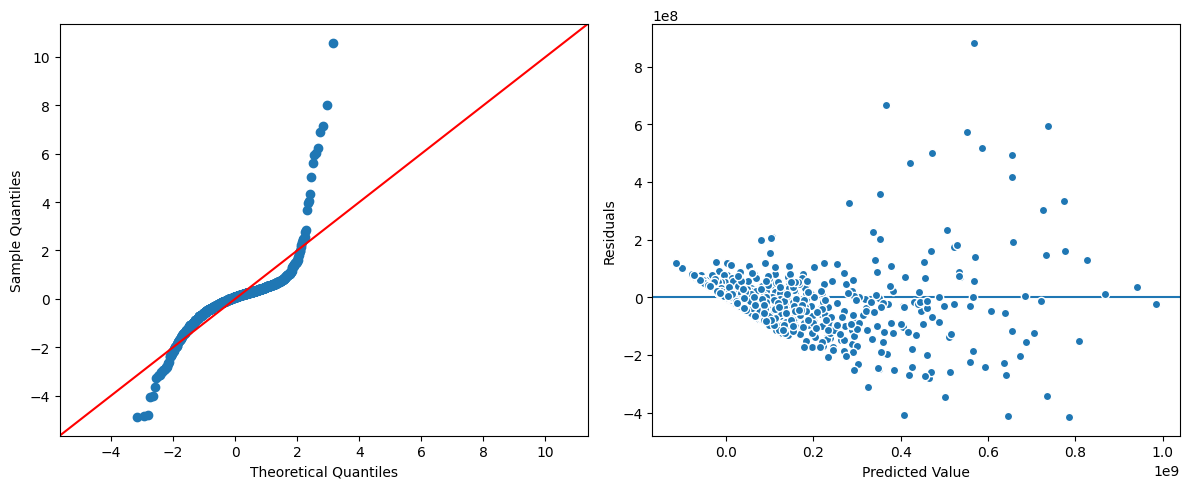

In [58]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()

evaluate_ols(result,X_test_df,y_test)
result.summary()


In [59]:
result.params

const                   -578,246,587.98
certification_G          -87,975,445.41
certification_MISSING    -72,733,721.09
certification_NC-17      -62,882,980.45
certification_NR         -78,688,446.10
certification_PG         -78,525,793.12
certification_PG-13      -92,074,271.64
certification_R         -105,365,928.08
adult                              0.00
budget                             1.84
popularity                   156,757.03
runtime                      233,022.00
vote_average              -3,243,579.99
vote_count                    28,824.76
year                         318,190.52
month                       -737,244.85
day                          -67,864.89
belongs_to_collection     48,340,192.72
Genre_Family             -13,541,637.45
Genre_Animation           23,234,631.42
Genre_Science Fiction    -33,122,577.75
Genre_Thriller            -4,020,065.15
Genre_Mystery            -13,407,621.12
Genre_Drama                  574,512.92
Genre_Romance              7,604,584.28


# 📽️ Return to "Diagnosing Linear Regression Models" Slides

- Slide Deck: https://docs.google.com/presentation/d/1K5hNAJ9bna6dfVJN4-A21SrsRP04Zg8kktgj63UEgi8/edit?usp=sharing

# Improving Our Model 

- Let's address all 4 assumptions and see if our model improves.

## Assumption of Linearity

In [60]:
## concatenating training data into plot_df
plot_df = pd.concat([X_train_df,y_train],axis=1)
plot_df

,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,revenue
9263,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,"8,000,000.00",16.15,106.00,6.30,449.00,"2,013.00",8.00,30.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,"9,630,444.00"
20483,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,"9,000,000.00",21.73,138.00,7.50,"4,851.00","2,016.00",11.00,18.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"78,988,148.00"
52156,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,"82,500,000.00",33.76,107.00,6.20,"5,830.00","2,006.00",6.00,23.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,"240,685,326.00"
48065,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,"28,000,000.00",22.53,102.00,5.40,904.00,"2,003.00",3.00,14.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"58,795,814.00"
715,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,"30,000,000.00",15.21,107.00,5.60,"1,240.00","2,010.00",2.00,26.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"55,583,804.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,"12,902,809.00",4.46,108.00,7.40,"1,796.00","2,010.00",4.00,29.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,"36,000,000.00"
15866,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,"15,000,000.00",11.00,128.00,5.90,220.00,"2,015.00",9.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,"1,592,853.00"
49811,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,"17,500,000.00",22.15,121.00,7.70,"2,279.00","2,004.00",3.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,"38,000,000.00"
43501,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,"185,000,000.00",408.22,132.00,7.70,"6,086.00","2,021.00",7.00,28.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,"167,417,425.00"


In [61]:
## save plot_cols list to show (dropping genre from plot_df from pair_plot)
genre_cols = [c for c in df.columns if c.startswith('Genre')]
plot_cols = plot_df.drop(columns=['revenue',*genre_cols]).columns
len(plot_cols)

18

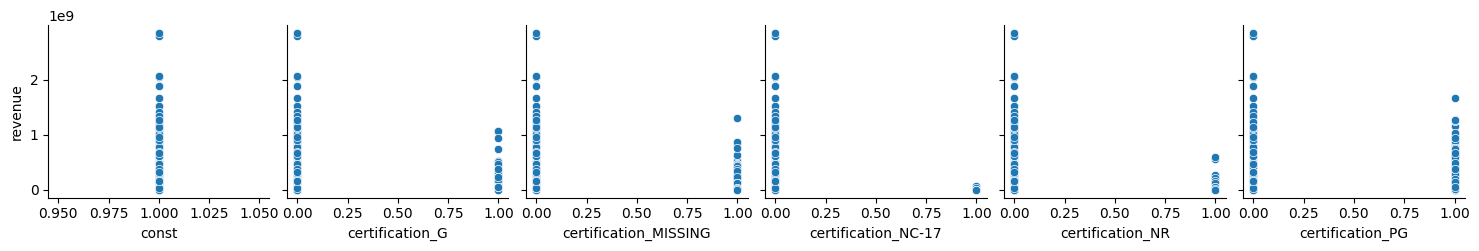

In [62]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[:6]);

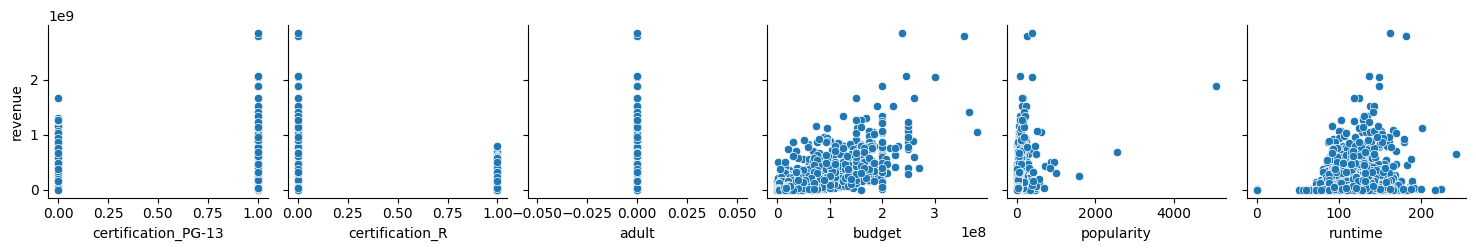

In [63]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[6:12])

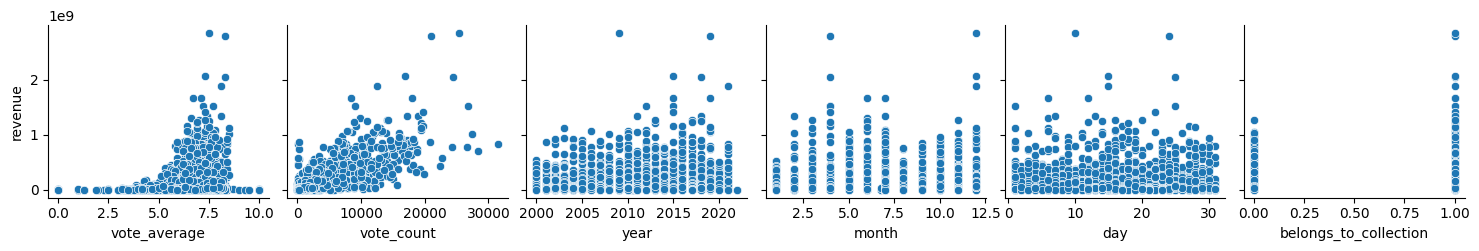

In [64]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[12:])

## Removing Outliers

In [65]:
from scipy import stats
def find_outliers(data, verbose=True):
    outliers = np.abs(stats.zscore(data))>3
    
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")
    return outliers

In [66]:
## save a dictionary of the T/F outlier index for each feature in outleir_cols
outlier_cols = ['runtime','popularity','revenue']

outliers = {}
for col in outlier_cols:
    outliers_col = find_outliers(df[col])
    outliers[col] = outliers_col

- 0 outliers found in runtime using Z-Scores.
- 34 outliers found in popularity using Z-Scores.
- 128 outliers found in revenue using Z-Scores.


In [67]:
# Make new df_clean copy of df
df_clean = df.copy()

## loop through dictionary to remove outliers
for col, idx_outliers in outliers.items():
    df_clean = df_clean[~idx_outliers]
df_clean

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_43708/1890287056.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[~idx_outliers]


,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
4,tt0398286,0.00,False,"260,000,000.00",119.17,"592,461,732.00",100.00,Tangled,7.60,"9,364.00",PG,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,010.00",11.00,24.00
6,tt0411951,0.00,True,"30,000,000.00",70.69,"967,000.00",92.00,Tekken,5.40,553.00,R,False,False,True,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,"2,010.00",3.00,20.00
9,tt0427152,0.00,False,"69,000,000.00",21.75,"86,387,857.00",114.00,Dinner for Schmucks,5.60,"1,452.00",PG-13,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"2,010.00",7.00,30.00
10,tt0429493,0.00,False,"110,000,000.00",56.49,"177,238,796.00",117.00,The A-Team,6.40,"3,877.00",PG-13,False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,"2,010.00",6.00,9.00
14,tt0446029,0.00,False,"85,000,000.00",37.00,"48,000,000.00",112.00,Scott Pilgrim vs. the World,7.50,"6,331.00",PG-13,False,False,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,False,"2,010.00",8.00,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59859,tt1532382,0.00,True,"3,500,000.00",4.84,"3,704,408.00",97.00,Hooked on the Game,6.30,42.00,NaN,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,"2,009.00",11.00,26.00
59887,tt1542960,0.00,False,"300,000.00",1.94,"200,000.00",122.00,The Figurine (Araromire),4.20,11.00,NaN,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,"2,009.00",10.00,2.00
59923,tt1560950,0.00,True,600.00,1.79,3.00,81.00,D@bbe 2,1.90,10.00,NaN,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,"2,009.00",12.00,24.00
59929,tt1565058,0.00,True,"125,000.00",5.99,"3,470,000.00",88.00,A Blood Pledge,5.40,40.00,NaN,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,"2,009.00",6.00,18.00


In [68]:
## REPEAT PREPROCESSING CODE
## Make x and y variables
drop_for_model = ['title','imdb_id']##,'year']

y = df_clean['revenue'].copy()
X = df_clean.drop(columns=['revenue',*drop_for_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train

## make X_train_tf 
preprocessor.fit(X_train)
final_features = preprocessor.get_feature_names_out()

X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)

X_test_tf = pd.DataFrame( preprocessor.transform(X_test), 
                         columns=final_features, index=X_test.index)

## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, has_constant='add')
X_test_df = sm.add_constant(X_test_tf, has_constant='add')
display(X_test_df.head(), X_train_df.head())

,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
28141,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,"51,000,000.00",39.03,97.00,6.40,"2,147.00","2,018.00",8.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57987,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,"32,000,000.00",20.19,111.00,7.00,"3,018.00","2,009.00",11.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
22879,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,"450,000.00",2.05,134.00,7.10,23.00,"2,016.00",10.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
37756,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,"587,640.00",4.55,145.00,7.00,25.00,"2,020.00",2.00,7.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3592,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,"25,000,000.00",10.05,80.00,7.20,"2,423.00","2,011.00",9.00,16.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
2637,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,"35,000,000.00",28.81,103.00,6.20,"2,298.00","2,011.00",10.00,12.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
56603,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,"30,000,000.00",27.02,84.00,4.00,"1,319.00","2,008.00",1.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
52503,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,"7,400,000.00",11.45,193.00,6.40,162.00,"2,006.00",8.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
242,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,"40,000,000.00",133.46,140.00,6.50,"4,937.00","2,010.00",6.00,10.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
56378,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"25,000,000.00",10.49,83.00,5.60,331.00,"2,008.00",3.00,7.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     347.3
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:11:59   Log-Likelihood:                -71160.
No. Observations:                3702   AIC:                         1.424e+05
Df Residuals:                    3667   BIC:                         1.426e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.515e+08   2.92e+08      1.547      0.122   -1.21e+08    1.02e+09
certification_G        7.195e+07   4.18e+07      1.723      0.085   -9.93e+06    1.54e+08
certification_MISSING  6.754e+07   4.21e+07      1.604      0.109    -1.5e+07     1.5e+08
certification_NC-17     5.84e+07   4.48e+07      1.304      0.192   -2.94e+07    1.46e+08
certification_NR       6.618e+07   4.22e+07      1.570      0.117   -1.65e+07    1.49e+08
certification_PG       7.457e+07   4.17e+07      1.786      0.074   -7.28e+06    1.56e+08
certification_PG-13    6.312e+07   4.17e+07      1.515      0.130   -1.86e+07    1.45e+08
certification_R        4.978e+07   4.17e+07      1.194      0.233    -3.2e+07    1.32e+08
adult                  -5.32e+05   5.43e+07     -0.010      0.992   -1.07e+08    1.06e+08
budget                    1.3738      0.035     39.345      0.000       1.305       1.442
popularity             2.507e+05   4.02e+04      6.235      0.000    1.72e+05     3.3e+05
runtime                1.231e+05   4.97e+04      2.476      0.013    2.56e+04    2.21e+05
vote_average          -3.242e+05   8.49e+05     -0.382      0.703   -1.99e+06    1.34e+06
vote_count              2.02e+04    486.268     41.542      0.000    1.92e+04    2.12e+04
year                  -2.656e+05   1.66e+05     -1.600      0.110   -5.91e+05    5.98e+04
month                 -3.817e+05    2.6e+05     -1.468      0.142   -8.91e+05    1.28e+05
day                   -4.505e+04   1.04e+05     -0.432      0.666   -2.49e+05    1.59e+05
belongs_to_collection    3.2e+07   2.44e+06     13.115      0.000    2.72e+07    3.68e+07
Genre_Family          -2.606e+06   4.65e+06     -0.561      0.575   -1.17e+07     6.5e+06
Genre_Animation        1.245e+07   4.84e+06      2.572      0.010    2.96e+06    2.19e+07
Genre_Science Fiction  -2.72e+07   3.42e+06     -7.942      0.000   -3.39e+07   -2.05e+07
Genre_Thriller         7.653e+05   2.46e+06      0.312      0.755   -4.05e+06    5.58e+06
Genre_Mystery         -5.275e+06   3.38e+06     -1.563      0.118   -1.19e+07    1.34e+06
Genre_Drama            -2.83e+06    2.3e+06     -1.233      0.218   -7.33e+06    1.67e+06
Genre_Romance          4.854e+06   2.57e+06      1.889      0.059   -1.84e+05    9.89e+06
Genre_Comedy           6.737e+06   2.32e+06      2.907      0.004    2.19e+06    1.13e+07
Genre_War              3.254e+05   5.23e+06      0.062      0.950   -9.93e+06    1.06e+07
Genre_Crime            -5.72e+06   2.79e+06     -2.050      0.040   -1.12e+07    -2.5e+05
Genre_Action          -2.344e+06   2.49e+06     -0.942      0.346   -7.22e+06    2.53e+06
Genre_Adventure       -6.136e+05   2.99e+06     -0.205      0.838   -6.48e+06    5.25e+06
Genre_Horror           2.238e+06   3.32e+06      0.673      0.501   -4.28e+06    8.75e+06
Genre_Fantasy         -

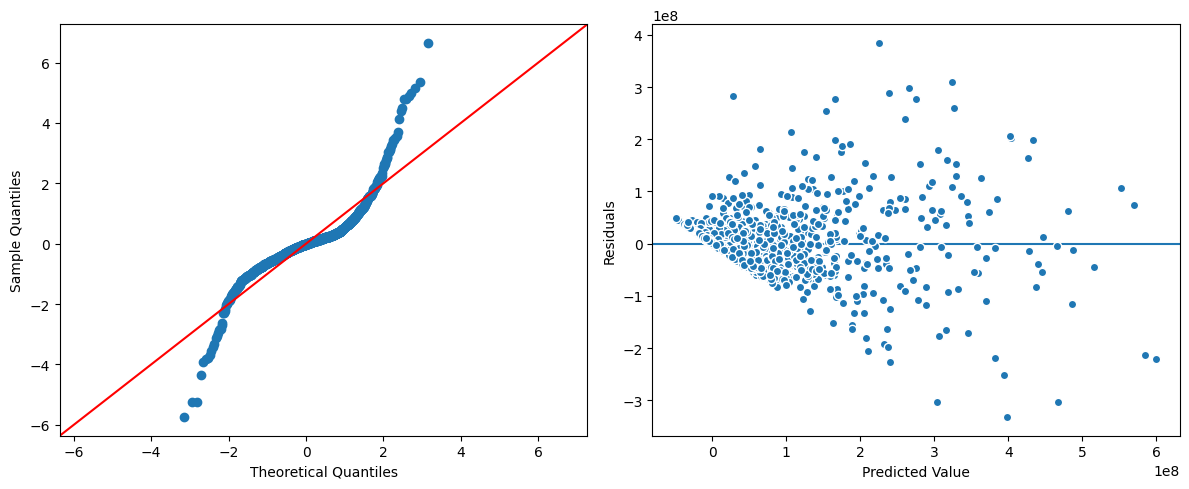

In [69]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()

evaluate_ols(result,X_test_df,y_test)
result.summary()


# Addressing Multicollinearity

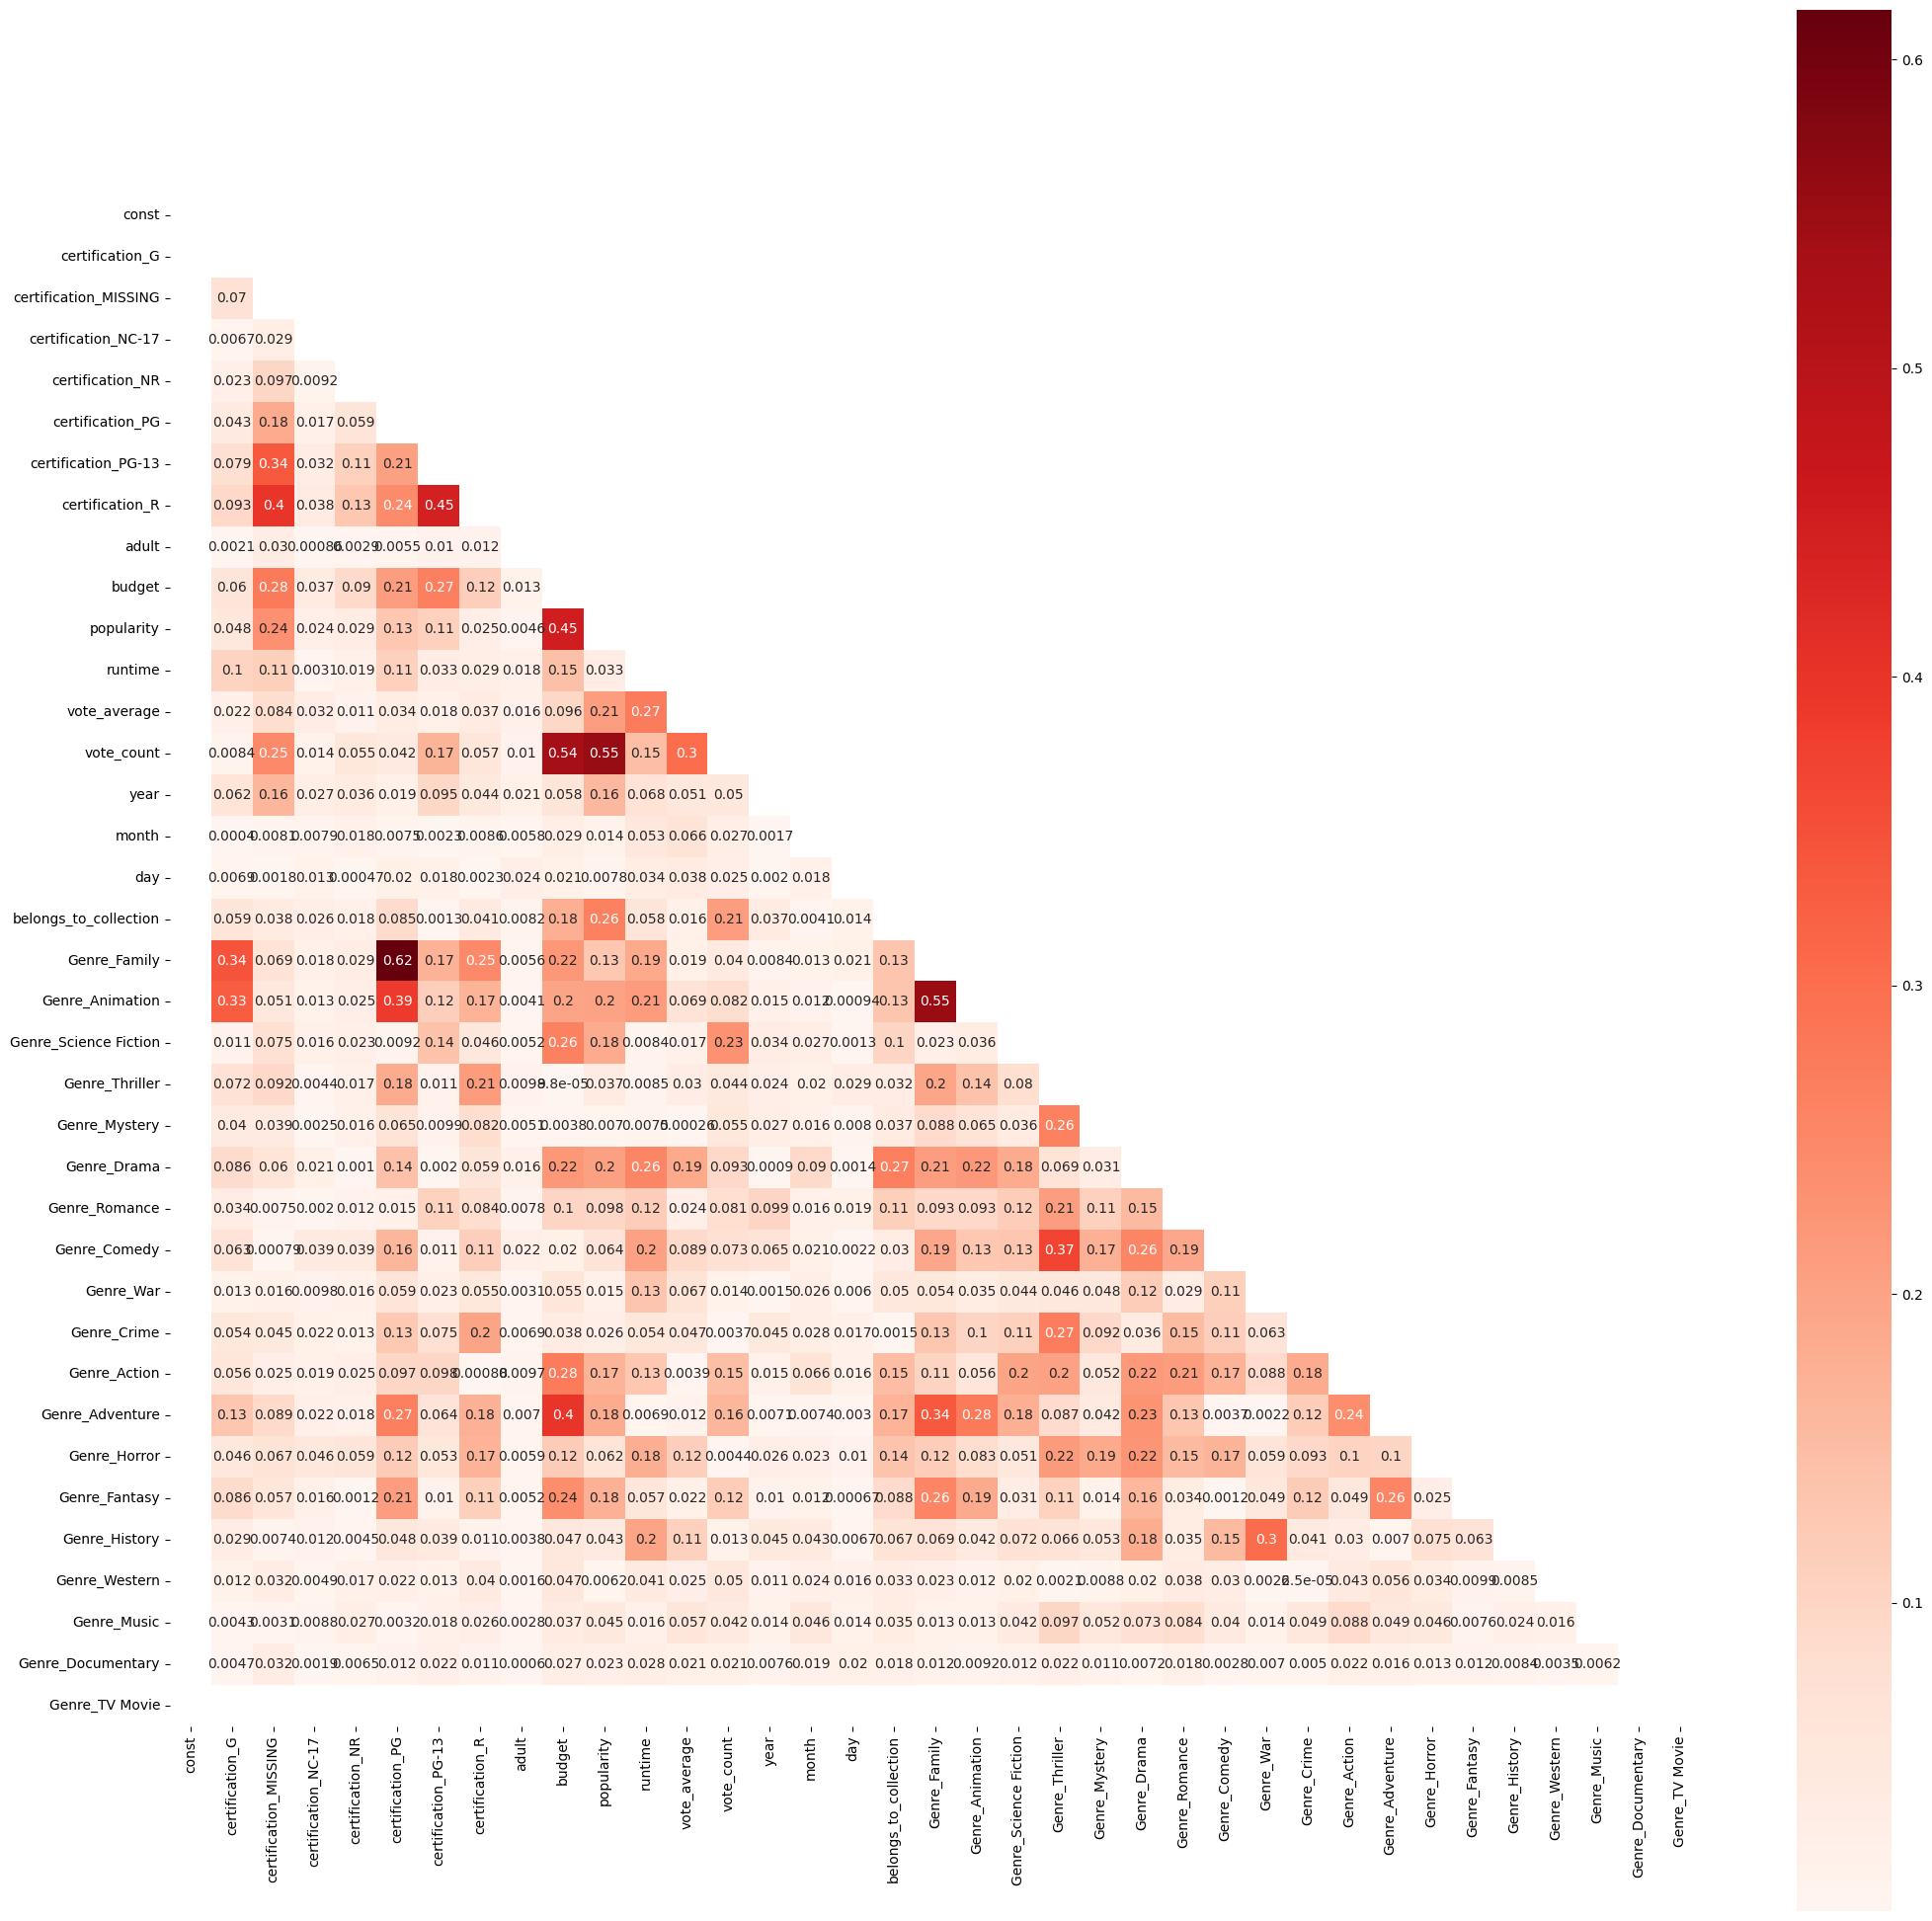

In [70]:
## Calculating the mask to hide the upper-right of the triangle
plt.figure(figsize=(25,25))
corr = X_train_df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

## Variance Inflation Factor

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# separate just x-data and subtract mean
features = X_train_df -  X_train_df.mean()

features

,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
2637,0.00,-0.02,-0.23,-0.00,-0.03,-0.10,-0.27,0.65,-0.00,"5,720,157.13",5.56,-5.95,-0.05,652.66,0.62,3.23,-3.30,0.80,-0.10,-0.06,0.91,0.74,0.91,-0.50,-0.19,-0.36,-0.03,-0.15,-0.26,-0.15,0.88,-0.09,-0.05,-0.01,-0.03,-0.00,0.00
56603,0.00,-0.02,-0.23,-0.00,-0.03,-0.10,0.73,-0.35,-0.00,"720,157.13",3.77,-24.95,-2.25,-326.34,-2.38,-5.77,8.70,-0.20,-0.10,-0.06,-0.09,-0.26,-0.09,-0.50,-0.19,0.64,-0.03,-0.15,-0.26,-0.15,-0.12,-0.09,-0.05,-0.01,-0.03,-0.00,0.00
52503,0.00,-0.02,0.77,-0.00,-0.03,-0.10,-0.27,-0.35,-0.00,"-21,879,842.87",-11.80,84.05,0.15,"-1,483.34",-4.38,1.23,-4.30,-0.20,-0.10,-0.06,-0.09,-0.26,-0.09,0.50,0.81,-0.36,-0.03,-0.15,-0.26,-0.15,-0.12,-0.09,-0.05,-0.01,-0.03,-0.00,0.00
242,0.00,-0.02,-0.23,-0.00,-0.03,0.90,-0.27,-0.35,-0.00,"10,720,157.13",110.20,31.05,0.25,"3,291.66",-0.38,-0.77,-5.30,-0.20,0.90,-0.06,-0.09,-0.26,-0.09,0.50,-0.19,-0.36,-0.03,-0.15,0.74,0.85,-0.12,-0.09,-0.05,-0.01,-0.03,-0.00,0.00
56378,0.00,0.98,-0.23,-0.00,-0.03,-0.10,-0.27,-0.35,-0.00,"-4,279,842.87",-12.76,-25.95,-0.65,"-1,314.34",-2.38,-3.77,-8.30,-0.20,0.90,-0.06,-0.09,-0.26,-0.09,-0.50,-0.19,0.64,-0.03,-0.15,-0.26,-0.15,-0.12,-0.09,-0.05,-0.01,-0.03,-0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.00,-0.02,-0.23,-0.00,-0.03,-0.10,-0.27,0.65,-0.00,"-21,279,842.87",-15.00,-14.95,-1.25,"-1,560.34",0.62,-5.77,-5.30,-0.20,-0.10,-0.06,-0.09,-0.26,-0.09,0.50,0.81,-0.36,-0.03,-0.15,-0.26,-0.15,-0.12,0.91,-0.05,-0.01,-0.03,-0.00,0.00
16145,0.00,-0.02,-0.23,-0.00,-0.03,-0.10,-0.27,0.65,-0.00,"-27,179,842.87",-22.16,17.05,-6.25,"-1,645.34",4.62,3.23,0.70,-0.20,-0.10,-0.06,-0.09,-0.26,-0.09,0.50,-0.19,-0.36,-0.03,0.85,-0.26,-0.15,-0.12,-0.09,-0.05,-0.01,-0.03,-0.00,0.00
50812,0.00,-0.02,-0.23,-0.00,-0.03,-0.10,-0.27,0.65,-0.00,"-22,279,842.87",-0.22,-1.95,0.55,-553.34,-5.38,0.23,6.70,0.80,-0.10,-0.06,-0.09,-0.26,-0.09,0.50,-0.19,-0.36,-0.03,0.85,-0.26,-0.15,0.88,-0.09,-0.05,-0.01,-0.03,-0.00,0.00
44371,0.00,-0.02,-0.23,-0.00,-0.03,-0.10,-0.27,0.65,-0.00,"-15,279,842.87",-7.86,-11.95,-1.45,"-1,284.34",-10.38,2.23,6.70,0.80,-0.10,-0.06,-0.09,0.74,0.91,-0.50,-0.19,-0.36,-0.03,-0.15,-0.26,-0.15,0.88,-0.09,-0.05,-0.01,-0.03,-0.00,0.00


In [72]:
# create a list of VIF scores for each feature in features.
vif_scores = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# create a new dataframe to hold the VIF scores 
VIF = pd.Series(vif_scores, index=features.columns)
VIF

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const                                        NaN
certification_G         1,125,899,906,842,624.00
certification_MISSING   9,007,199,254,740,992.00
certification_NC-17        52,983,525,027,888.19
certification_NR           19,246,152,253,720.07
certification_PG                             inf
certification_PG-13       428,914,250,225,761.50
certification_R         9,007,199,254,740,992.00
adult                                       1.00
budget                                      2.15
popularity                                  1.75
runtime                                     1.41
vote_average                                1.29
vote_count                                  1.92
year                                        1.13
month                                       1.03
day                                         1.01
belongs_to_collection                       1.19
Genre_Family                                2.51
Genre_Animation                             1.65
Genre_Science Fictio

In [73]:
## Sort VIF for inspect
VIF.sort_values()

adult                                       1.00
Genre_Documentary                           1.01
day                                         1.01
Genre_Western                               1.02
month                                       1.03
Genre_Music                                 1.03
year                                        1.13
Genre_Mystery                               1.14
Genre_War                                   1.15
Genre_Fantasy                               1.18
belongs_to_collection                       1.19
Genre_History                               1.21
Genre_Science Fiction                       1.22
Genre_Romance                               1.26
Genre_Crime                                 1.26
vote_average                                1.29
runtime                                     1.41
Genre_Horror                                1.42
Genre_Adventure                             1.46
Genre_Thriller                              1.48
Genre_Action        

In [74]:
## remove infinite values from VIF and sort
VIF = VIF[VIF!=np.inf].sort_values()
VIF

adult                                       1.00
Genre_Documentary                           1.01
day                                         1.01
Genre_Western                               1.02
month                                       1.03
Genre_Music                                 1.03
year                                        1.13
Genre_Mystery                               1.14
Genre_War                                   1.15
Genre_Fantasy                               1.18
belongs_to_collection                       1.19
Genre_History                               1.21
Genre_Science Fiction                       1.22
Genre_Romance                               1.26
Genre_Crime                                 1.26
vote_average                                1.29
runtime                                     1.41
Genre_Horror                                1.42
Genre_Adventure                             1.46
Genre_Thriller                              1.48
Genre_Action        

In [75]:
## filter for VIF that are > 5
VIF[VIF>5]

certification_NR           19,246,152,253,720.07
certification_NC-17        52,983,525,027,888.19
certification_PG-13       428,914,250,225,761.50
certification_G         1,125,899,906,842,624.00
certification_MISSING   9,007,199,254,740,992.00
certification_R         9,007,199,254,740,992.00
dtype: float64

In [76]:
high_vif = VIF[VIF>5].index
high_vif

Index(['certification_NR', 'certification_NC-17', 'certification_PG-13',
       'certification_G', 'certification_MISSING', 'certification_R'],
      dtype='object')

### FInal Model

In [77]:
df_final = df_clean.drop(columns='certification')
df_final

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
4,tt0398286,0.00,False,"260,000,000.00",119.17,"592,461,732.00",100.00,Tangled,7.60,"9,364.00",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"2,010.00",11.00,24.00
6,tt0411951,0.00,True,"30,000,000.00",70.69,"967,000.00",92.00,Tekken,5.40,553.00,False,False,True,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,"2,010.00",3.00,20.00
9,tt0427152,0.00,False,"69,000,000.00",21.75,"86,387,857.00",114.00,Dinner for Schmucks,5.60,"1,452.00",False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,"2,010.00",7.00,30.00
10,tt0429493,0.00,False,"110,000,000.00",56.49,"177,238,796.00",117.00,The A-Team,6.40,"3,877.00",False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,"2,010.00",6.00,9.00
14,tt0446029,0.00,False,"85,000,000.00",37.00,"48,000,000.00",112.00,Scott Pilgrim vs. the World,7.50,"6,331.00",False,False,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,False,"2,010.00",8.00,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59859,tt1532382,0.00,True,"3,500,000.00",4.84,"3,704,408.00",97.00,Hooked on the Game,6.30,42.00,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,"2,009.00",11.00,26.00
59887,tt1542960,0.00,False,"300,000.00",1.94,"200,000.00",122.00,The Figurine (Araromire),4.20,11.00,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,"2,009.00",10.00,2.00
59923,tt1560950,0.00,True,600.00,1.79,3.00,81.00,D@bbe 2,1.90,10.00,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,"2,009.00",12.00,24.00
59929,tt1565058,0.00,True,"125,000.00",5.99,"3,470,000.00",88.00,A Blood Pledge,5.40,40.00,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,"2,009.00",6.00,18.00


In [78]:
## Make x and y variables
drop_for_model = ['title','imdb_id']#,'certification']##,'year']

y = df_final['revenue'].copy()
X = df_final.drop(columns=['revenue',*drop_for_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train

## make X_train_tf 
preprocessor.fit(X_train)
final_features = preprocessor.get_feature_names_out()

X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)

X_test_tf = pd.DataFrame( preprocessor.transform(X_test), 
                         columns=final_features, index=X_test.index)

## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, has_constant='add')
X_test_df = sm.add_constant(X_test_tf, has_constant='add')
display(X_test_df.head(), X_train_df.head())

,const,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
28141,1.00,0.00,"51,000,000.00",39.03,97.00,6.40,"2,147.00","2,018.00",8.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57987,1.00,0.00,"32,000,000.00",20.19,111.00,7.00,"3,018.00","2,009.00",11.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
22879,1.00,0.00,"450,000.00",2.05,134.00,7.10,23.00,"2,016.00",10.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
37756,1.00,0.00,"587,640.00",4.55,145.00,7.00,25.00,"2,020.00",2.00,7.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3592,1.00,0.00,"25,000,000.00",10.05,80.00,7.20,"2,423.00","2,011.00",9.00,16.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


,const,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
2637,1.00,0.00,"35,000,000.00",28.81,103.00,6.20,"2,298.00","2,011.00",10.00,12.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
56603,1.00,0.00,"30,000,000.00",27.02,84.00,4.00,"1,319.00","2,008.00",1.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
52503,1.00,0.00,"7,400,000.00",11.45,193.00,6.40,162.00,"2,006.00",8.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
242,1.00,0.00,"40,000,000.00",133.46,140.00,6.50,"4,937.00","2,010.00",6.00,10.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
56378,1.00,0.00,"25,000,000.00",10.49,83.00,5.60,331.00,"2,008.00",3.00,7.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     412.5
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:12:02   Log-Likelihood:                -71194.
No. Observations:                3702   AIC:                         1.424e+05
Df Residuals:                    3673   BIC:                         1.426e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.984e+08    3.3e+08      0.904      0.366   -3.49e+08    9.45e+08
adult                  7.747e+06   5.47e+07      0.142      0.887   -9.95e+07    1.15e+08
budget                    1.3852      0.034     40.864      0.000       1.319       1.452
popularity             2.304e+05   4.02e+04      5.729      0.000    1.52e+05    3.09e+05
runtime                1.585e+05   4.93e+04      3.212      0.001    6.18e+04    2.55e+05
vote_average          -3.718e+05   8.53e+05     -0.436      0.663   -2.04e+06     1.3e+06
vote_count             1.977e+04    486.716     40.621      0.000    1.88e+04    2.07e+04
year                  -1.605e+05   1.64e+05     -0.977      0.329   -4.82e+05    1.62e+05
month                 -3.776e+05   2.62e+05     -1.441      0.150   -8.91e+05    1.36e+05
day                    -3.62e+04   1.05e+05     -0.345      0.730   -2.42e+05     1.7e+05
belongs_to_collection  3.302e+07   2.45e+06     13.461      0.000    2.82e+07    3.78e+07
Genre_Family           7.081e+06   3.88e+06      1.826      0.068   -5.23e+05    1.47e+07
Genre_Animation        1.544e+07   4.77e+06      3.240      0.001     6.1e+06    2.48e+07
Genre_Science Fiction -2.666e+07   3.45e+06     -7.736      0.000   -3.34e+07   -1.99e+07
Genre_Thriller        -1.465e+06   2.46e+06     -0.596      0.551   -6.28e+06    3.35e+06
Genre_Mystery         -5.095e+06    3.4e+06     -1.498      0.134   -1.18e+07    1.57e+06
Genre_Drama           -3.474e+06   2.31e+06     -1.503      0.133      -8e+06    1.06e+06
Genre_Romance          5.666e+06   2.58e+06      2.200      0.028    6.17e+05    1.07e+07
Genre_Comedy           6.509e+06   2.33e+06      2.795      0.005    1.94e+06    1.11e+07
Genre_War             -2.538e+06   5.25e+06     -0.483      0.629   -1.28e+07    7.76e+06
Genre_Crime           -8.956e+06   2.78e+06     -3.223      0.001   -1.44e+07   -3.51e+06
Genre_Action          -2.083e+06    2.5e+06     -0.834      0.404   -6.98e+06    2.81e+06
Genre_Adventure        5.793e+05   3.01e+06      0.193      0.847   -5.32e+06    6.48e+06
Genre_Horror          -1.109e+06   3.31e+06     -0.335      0.738   -7.61e+06    5.39e+06
Genre_Fantasy         -8.455e+06    3.4e+06     -2.486      0.013   -1.51e+07   -1.79e+06
Genre_History          -5.43e+06   4.53e+06     -1.200      0.230   -1.43e+07    3.44e+06
Genre_Western         -3.765e+07   9.64e+06     -3.906      0.000   -5.65e+07   -1.88e+07
Genre_Music            8.306e+06   5.54e+06      1.499      0.134   -2.56e+06    1.92e+07
Genre_Documentary      1.231e+07   2.45e+07      0.502      0.616   -3.57e+07    6.04e+07
Genre_TV Movie                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                     1585.

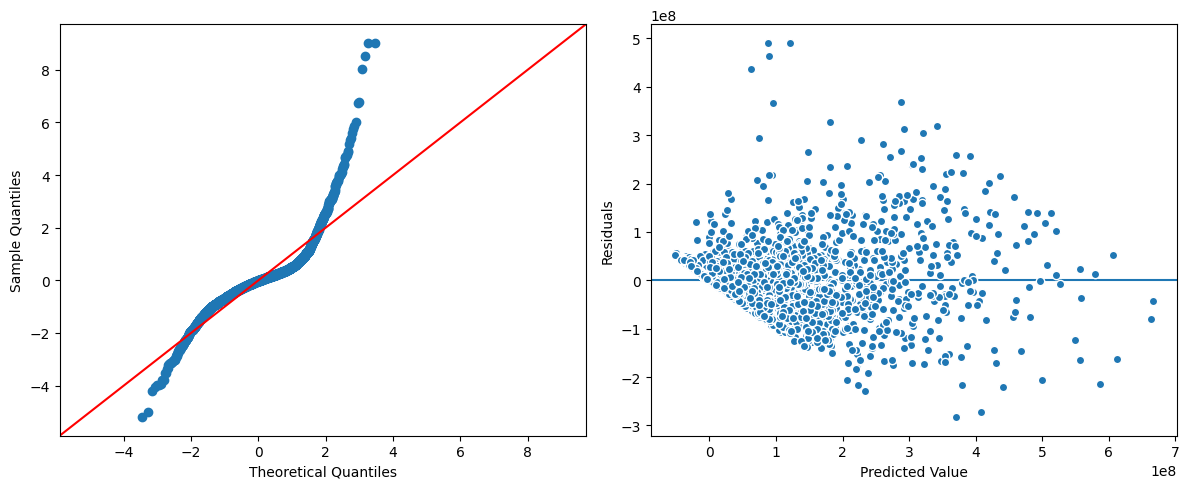

In [79]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)
result.summary()

In [80]:
result.params

const                   298,422,145.57
adult                     7,747,081.38
budget                            1.39
popularity                  230,449.68
runtime                     158,513.95
vote_average               -371,848.54
vote_count                   19,770.90
year                       -160,477.62
month                      -377,583.25
day                         -36,197.00
belongs_to_collection    33,016,121.32
Genre_Family              7,081,061.19
Genre_Animation          15,439,293.78
Genre_Science Fiction   -26,661,698.54
Genre_Thriller           -1,465,267.57
Genre_Mystery            -5,095,337.84
Genre_Drama              -3,473,911.43
Genre_Romance             5,666,176.83
Genre_Comedy              6,509,269.59
Genre_War                -2,538,490.24
Genre_Crime              -8,955,721.85
Genre_Action             -2,082,628.28
Genre_Adventure             579,305.54
Genre_Horror             -1,108,782.09
Genre_Fantasy            -8,454,520.83
Genre_History            

## Compare to Alternative Regressors

- Linear regression is VERY picky. What about other regressors?
- Let's return to our previous data that includes outliers and certification and use a random forest.

In [81]:
## REPEAT PREPROCESSING CODE
## Make x and y variables
drop_for_model = ['title','imdb_id']##,'year']

y = df['revenue'].copy()
X = df.drop(columns=['revenue',*drop_for_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train

## make X_train_tf 
preprocessor.fit(X_train)
final_features = preprocessor.get_feature_names_out()

X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)

X_test_tf = pd.DataFrame( preprocessor.transform(X_test), 
                         columns=final_features, index=X_test.index)

## Make final X_train_df and X_test_df with constants added

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Training R^2: 0.970
Testing R^2: 0.792


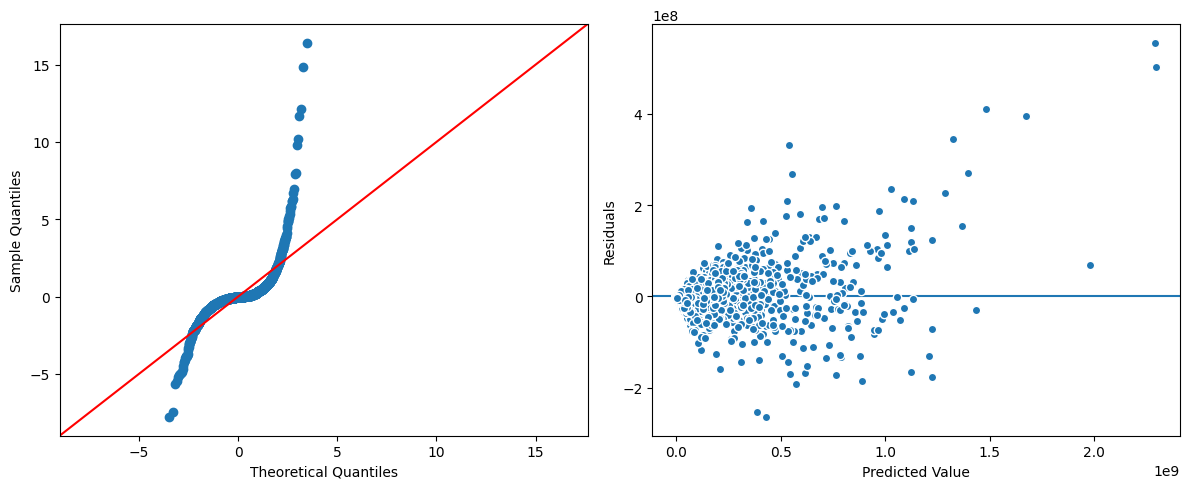

In [82]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(verbose=1,random_state=42)
reg.fit(X_train_tf, y_train)

## Get train data performance from skearn to confirm matches OLS
y_hat_train = reg.predict(X_train_tf)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = reg.predict(X_test_tf)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

evaluate_ols(reg, X_train_tf, y_train)

In [83]:
pd.Series(reg.feature_importances_, index=final_features).sort_values(ascending=False)

vote_count              0.51
budget                  0.30
popularity              0.04
runtime                 0.02
year                    0.02
day                     0.02
vote_average            0.02
month                   0.02
Genre_Adventure         0.01
belongs_to_collection   0.01
Genre_Fantasy           0.00
Genre_Science Fiction   0.00
certification_R         0.00
Genre_Thriller          0.00
Genre_Animation         0.00
Genre_Comedy            0.00
Genre_Drama             0.00
certification_MISSING   0.00
certification_PG        0.00
Genre_Family            0.00
Genre_Action            0.00
Genre_Romance           0.00
certification_PG-13     0.00
Genre_Crime             0.00
Genre_War               0.00
Genre_Mystery           0.00
Genre_Music             0.00
Genre_Horror            0.00
certification_G         0.00
Genre_History           0.00
certification_NR        0.00
Genre_Western           0.00
certification_NC-17     0.00
Genre_Documentary       0.00
adult         

- random forest outperformed the linear regression, and required much less preprocessing.
- However, the random forest model is very overfit compared to the linear regression.